In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.stats import linregress

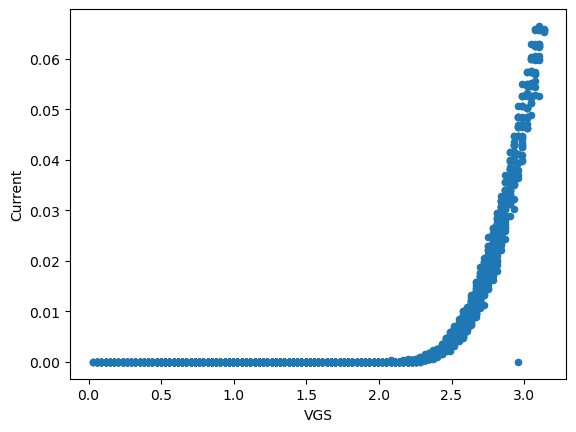

In [8]:
# Replace 'your_file.xlsx' with the path to your Excel file
excel_file = pd.ExcelFile('C:/Users/PC/Desktop/Senior Project/2N7000.xlsx')

# Get the list of sheet names in the Excel file
sheet_names = excel_file.sheet_names

# Create an empty dictionary to store DataFrames for each sheet
dfs = {}

# Loop through each sheet and read it into a DataFrame
for sheet_name in sheet_names:
    if sheet_name.isdigit():
        dfs[sheet_name] = pd.read_excel(excel_file, sheet_name)

# Loop through each DataFrame in the dictionary and remove every other column starting from the first one
for sheet_name, df in dfs.items():
    # Select every other column starting from the second one
    columns_to_keep = df.columns[1::2]
    # Update the DataFrame to keep only the selected columns
    dfs[sheet_name] = df[columns_to_keep]

# Loop through each DataFrame in the dictionary
for sheet_name, df in dfs.items():
    # Delete rows with NaN in the first column
    dfs[sheet_name] = df.dropna(subset=[df.columns[0]])

# Column labels
labels = ['GVoltage', 'DVoltage', 'SVoltage', 'VGS', 'Current']

# Loop through each DataFrame in the dictionary
for sheet_name, df in dfs.items():
    dfs[sheet_name].columns = labels

# Concatenate all DataFrames in dfs into one DataFrame
combined_df = pd.concat(dfs.values(), ignore_index=True)
# Plot the combined dataframe
combined_df.plot(kind='scatter', x='VGS', y='Current')

# Create a new figure and axis object
#fig, ax = plt.subplots()

# Plot each DataFrame in dfs on the same axis
#for df in dfs.values():
#    df.plot(ax=ax)

# Show the plot
plt.show()

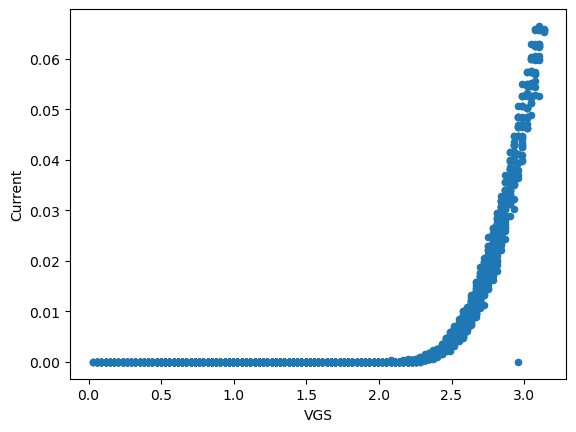

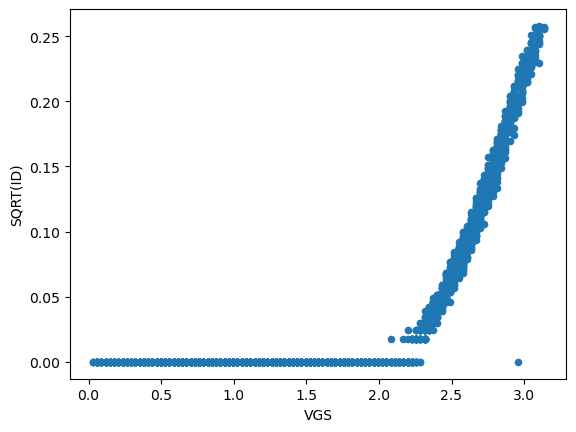

In [9]:
# Replace 'your_file.xlsx' with the path to your Excel file
excel_file = pd.ExcelFile('C:/Users/PC/Desktop/Senior Project/Revised1.xlsx')

# Get the list of sheet names in the Excel file
sheet_names = excel_file.sheet_names

# Create an empty dictionary to store DataFrames for each sheet
dfs = {}

# Loop through each sheet and read it into a DataFrame
for sheet_name in sheet_names:
    if sheet_name.isdigit():
        dfs[sheet_name] = pd.read_excel(excel_file, sheet_name)

# Loop through each DataFrame in the dictionary and remove every other column starting from the first one
for sheet_name, df in dfs.items():
    # Select every other column starting from the second one
    columns_to_keep = df.columns[1::2]
    # Update the DataFrame to keep only the selected columns
    dfs[sheet_name] = df[columns_to_keep]

# Loop through each DataFrame in the dictionary
for sheet_name, df in dfs.items():
    # Delete rows with NaN in the first column
    dfs[sheet_name] = df.dropna(subset=[df.columns[0]])

# Column labels
labels = ['GVoltage', 'DVoltage', 'SVoltage', 'VGS', 'Current', 'SQRT(ID)']

# Loop through each DataFrame in the dictionary
for sheet_name, df in dfs.items():
    dfs[sheet_name].columns = labels

# Concatenate all DataFrames in dfs into one DataFrame
combined_df = pd.concat(dfs.values(), ignore_index=True)
# Plot the combined dataframe
combined_df.plot(kind='scatter', x='VGS', y='Current')

# Concatenate all DataFrames in dfs into one DataFrame
combined_df = pd.concat(dfs.values(), ignore_index=True)
# Plot the combined dataframe
combined_df.plot(kind='scatter', x='VGS', y='SQRT(ID)')

# Create a new figure and axis object
#fig, ax = plt.subplots()

# Plot each DataFrame in dfs on the same axis
#for df in dfs.values():
#    df.plot(ax=ax)

# Show the plot
plt.show()

Slope: 0.06097612840368486
Intercept: -0.06339334376191669
Kn 0.007436176470205327
Vt -1.0396419946873137


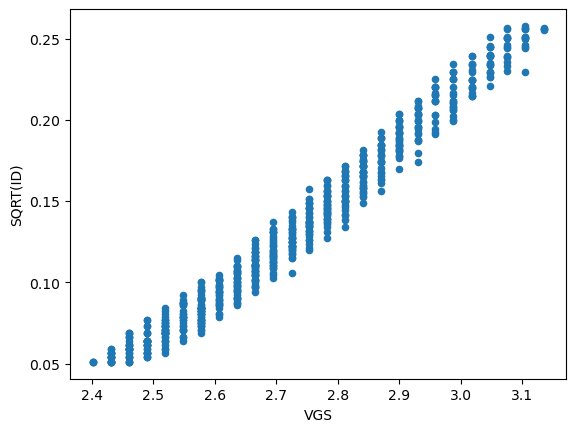

In [10]:
# Filter out rows where 'VGS' values are at or below 0
filtered_df = combined_df[combined_df['SQRT(ID)'] > 0.05]

# Plot the filtered DataFrame
filtered_df.plot(kind='scatter', x='VGS', y='SQRT(ID)')

slope, intercept, r_value, p_value, std_err = linregress(df['VGS'], df['SQRT(ID)'])

# Print the slope and intercept
print("Slope:", slope)
print("Intercept:", intercept)
Kn = 2*(slope)**2
print("Kn", Kn)
Vt = intercept/np.sqrt(Kn/2) 
print("Vt", Vt)
